<a href="https://colab.research.google.com/github/manusmriti31/Learning_PyTorch/blob/main/Video%20notebooks/02_pytorch_classification_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network classification with PyTorch
Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).
* Book version of this notebook - https://www.learnpytorch.io/02_pytorch_classification/
* Github repo of the course - https://github.com/mrdbourke/pytorch-deep-learning

## 1. Make classification data and get it ready

In [142]:
import sklearn

In [143]:
from sklearn.datasets import make_circles

# Set sample size to 1000
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

len(X), len(y)

(1000, 1000)

In [144]:
print(f"The first 5 entries of X: \n {X[:5]}")
print(f"The first 5 entries of y: \n {y[:5]}")

The first 5 entries of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
The first 5 entries of y: 
 [1 1 1 1 0]


In [145]:
# make data frame of the circle data
import pandas as pd

Circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "labels" : y})

Circles.head(10)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


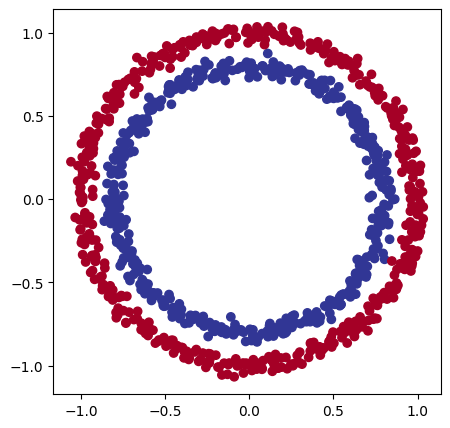

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c = y, cmap= plt.cm.RdYlBu)

**Note**: The dataset we are working on is often reffered to as toy data set, a dataset that is small enough to eperiment on and still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [147]:
X.shape, y.shape

((1000, 2), (1000,))

In [148]:
# view the first example for features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Vlaue of one of the sample of X: {X_sample}, and y: {y_sample}")
print(f"Shape of one of the sample of X: {X_sample.shape}, and y: {y_sample.shape}")

Vlaue of one of the sample of X: [0.75424625 0.23148074], and y: 1
Shape of one of the sample of X: (2,), and y: ()


### 1.2 Turn data into tensor and create train and test split


In [149]:
import torch
torch.__version__

'2.5.0+cu121'

In [150]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [151]:
type(X), X.dtype, type(y), y.dtype

(torch.Tensor, torch.float32, torch.Tensor, torch.float32)

In [152]:
# Split data into traina and testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [153]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model
Let's build a model toclassify our blue and red dots.

TO do so, we want to:
1. Setup device agnostic code
2. Construct a model (by subclassing nn.Module)
3. Define a loss functiona and optimizer
4. Setup our training loop

In [154]:
# Import nn
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Device: {device}")

Device: cuda


from types import MethodDescriptorType
Creating a model which will have:
1. Subclass `nn.Module`
2. Create two `nn.Linear()` layers
3. Defines a `forward()` method
4. Instantiate an instance of our model class

In [155]:
# 1. Construct a model that subclasses nn.Module

class CirclesModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create linear layers
    self.layer1 = nn.Linear(2,5)
    self.layer2 = nn.Linear(5,1)

  # 3. Creating the forward function
  def forward(self,x):
    return self.layer2(self.layer1(x)) # x -> layer1 -> layer2 -> output

In [156]:
# 4. Instantiate an instance of our model class and sent it to the target device
model_0 = CirclesModelV0().to(device)
print(f"Model 0: \n{model_0}")
print(f"Device: {next(model_0.parameters()).device}")

Model 0: 
CirclesModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)
Device: cuda:0


In [157]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(2,5),
    nn.Linear(5,1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [158]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6231,  0.2968, -0.1061, -0.3239,  0.6074], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0997, -0.2474, -0.2264, -0.0214,  0.2497]], device='cuda:0')),
             ('1.bias', tensor([-0.1143], device='cuda:0'))])

In [159]:
# Make first untrained predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"First 10 predictions: \n {torch.round(untrained_preds[:10])}")
print(f"FIrst 10 labels: \n {y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])
First 10 predictions: 
 tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')
FIrst 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 setup loss function and optimizer

Which loss function or optimizer should you use ?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how **wrong** you prediction is

In [160]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitLoss = sigmoid activation function build in

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [161]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train model

To train our model, buildig a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropogation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilites -> prediction labels.

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilites** by passing them through some kind of activation function (eg. sigmoid for binary classification and softmax for multiclass classification)

Then we convert the prediction probabilites to **prediction labels** by either rounding them or taking the `argmax()`.

In [162]:
# View the first 5 outputs of the forward pass on the test data

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1415],
        [-0.1357],
        [-0.0911],
        [-0.1561],
        [ 0.0132]], device='cuda:0')

In [163]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4647],
        [0.4661],
        [0.4772],
        [0.4611],
        [0.5033]], device='cuda:0')

For our prediction probability values, we need to perform a range - style rounding on them
* `y_preds_probs` >= 0.5, **y = 1** (class 1)
* `y_pred_probs` < 0.5, **y = 0** (class 0)

In [164]:
# Find the predictied labels
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0')

In [165]:
# In full (logits -> prediction probabilites -> prediction labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_preds_labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [166]:
# Check if both of them are the same
print(torch.eq(y_preds, y_preds_labels))
print(y_preds.squeeze())
print(y_preds_labels.squeeze())

tensor([[True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')
tensor([0., 0., 0., 0., 1.], device='cuda:0')
tensor([0., 0., 0., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)


### 3.3 Bulding a training and testing loop

In [167]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. forward pass
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculating the loss
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropogation)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculating loss/ acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_preds)

    # Print out what's happening
    if epoch % 10 == 0:
      print(f"Epoch {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch 0 | Loss: 0.69443, Acc: 45.00% | Test Loss: 0.69336, Test Acc: 45.50%
Epoch 10 | Loss: 0.69395, Acc: 47.38% | Test Loss: 0.69309, Test Acc: 48.00%
Epoch 20 | Loss: 0.69367, Acc: 48.00% | Test Loss: 0.69302, Test Acc: 48.50%
Epoch 30 | Loss: 0.69349, Acc: 48.38% | Test Loss: 0.69303, Test Acc: 47.00%
Epoch 40 | Loss: 0.69337, Acc: 48.38% | Test Loss: 0.69308, Test Acc: 47.50%
Epoch 50 | Loss: 0.69328, Acc: 49.00% | Test Loss: 0.69316, Test Acc: 46.00%
Epoch 60 | Loss: 0.69321, Acc: 49.62% | Test Loss: 0.69324, Test Acc: 45.00%
Epoch 70 | Loss: 0.69316, Acc: 49.38% | Test Loss: 0.69332, Test Acc: 43.50%
Epoch 80 | Loss: 0.69313, Acc: 48.62% | Test Loss: 0.69340, Test Acc: 49.00%
Epoch 90 | Loss: 0.69310, Acc: 48.62% | Test Loss: 0.69347, Test Acc: 48.50%


## 4. Make predictions and evaluate the model

To visualize the above model we would like to import a function called ` plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [168]:
import requests
from pathlib import Path

# Download helper function from learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_functions.py already exists, skipping download


In [169]:
from helper_functions import plot_predictions, plot_decision_boundary

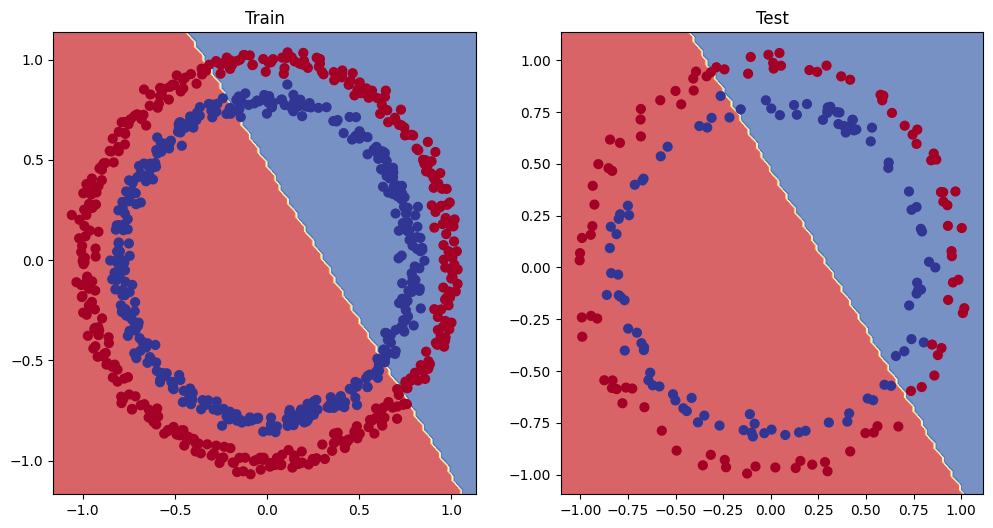

In [170]:
# Plot decision boundary of the model
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Improving a model (from a models perspective)
* Add more layers - give the model more chances to learn about pattersn in the data
* Add more hidden units - go from 5 hidden units to 10 hidden unit
* Fit for longer
* Changing the activation function
* change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 100

In [171]:
# Create a model
class CirclesModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(2,10)
    self.layer_2 = nn.Linear(10,10)
    self.layer_3 = nn.Linear(10,1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [172]:
model_1 = CirclesModelV1().to(device)
model_1

CirclesModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [173]:
# Creating a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Creating an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [174]:
# Training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put the train and testing data on the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  # 2. Calculating the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train,y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards (backpropogation)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    y_logit_test = model_1(X_test).squeeze()
    y_preds_test = torch.round(torch.sigmoid(y_logit_test))

    # 2. Calculating the loss
    test_loss = loss_fn(y_logit_test, y_test)
    test_acc = accuracy_fn(y_test,y_preds_test)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379, Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69437, Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


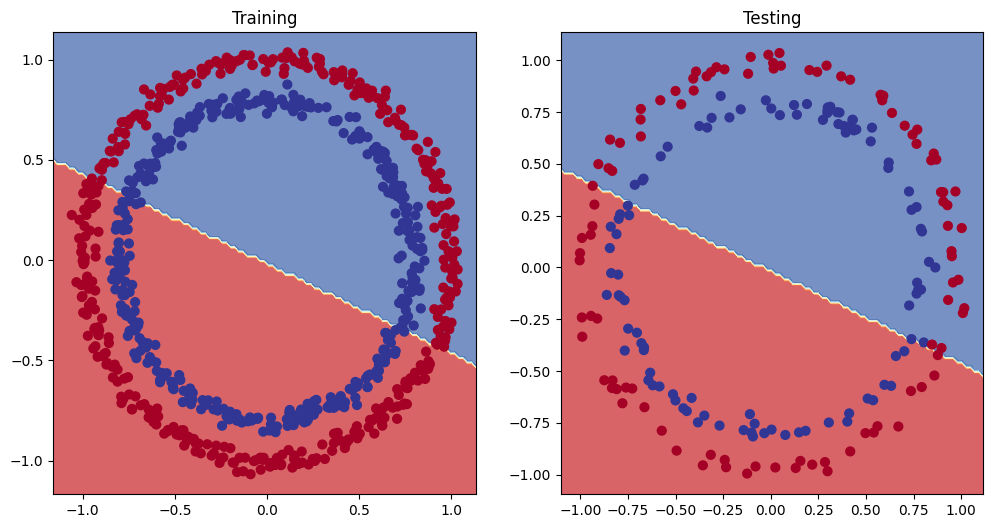

In [175]:
# Plot the decision boudary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_1,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line
One way to troubleshoot to a larger prhblem is to test out a smaller problem

In [176]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [177]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

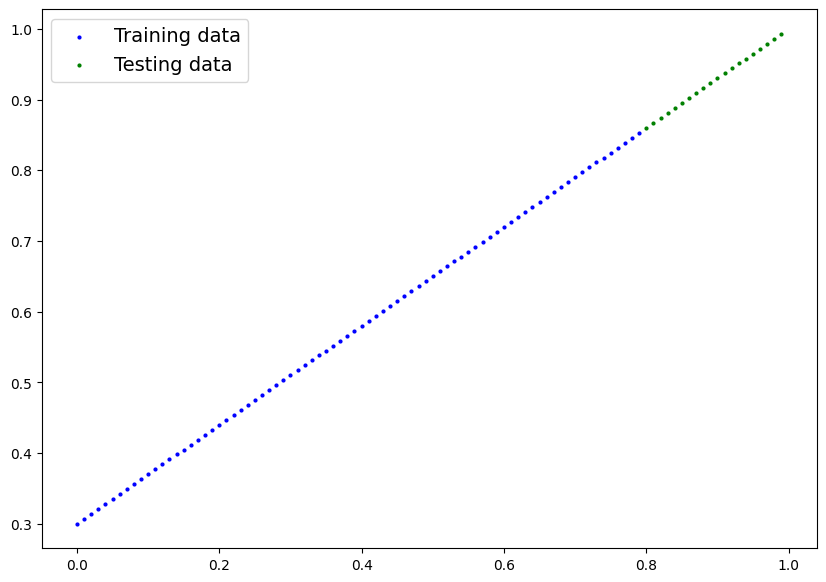

In [178]:
plot_predictions(X_train_regression, y_train_regression, X_test_regression, y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [179]:
# Smae architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(1,10),
    nn.Linear(10,10),
    nn.Linear(10,1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [180]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.01)

In [181]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put the data to the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  model_2.train()
  y_preds = model_2(X_train_regression)
  loss = loss_fn(y_preds,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_2.eval()
  with torch.inference_mode():
    y_test_preds = model_2(X_test_regression)
    test_loss = loss_fn(y_test_preds, y_test_regression)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


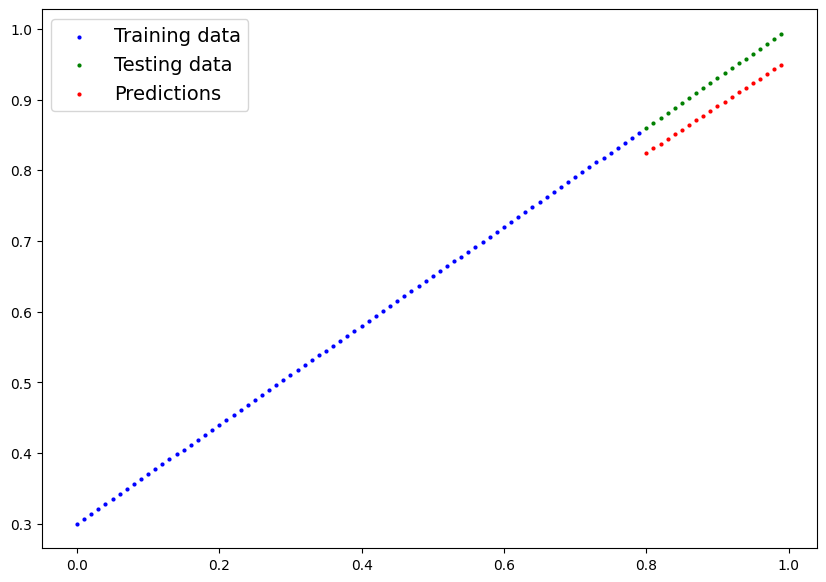

In [182]:
with torch.inference_mode():
  predictions = model_2(X_test_regression)

plot_predictions(X_train_regression.cpu(),y_train_regression.cpu(),X_test_regression.cpu(), y_test_regression.cpu(), predictions.cpu())

 ## 6. The missing piece: non-linearity

### 6.1 Recreating non-linear data (red and blue circles)

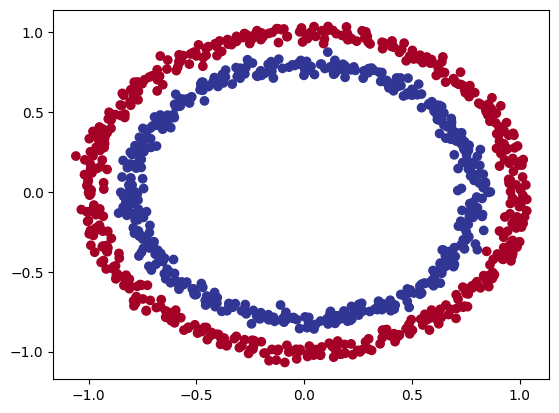

In [183]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise = 0.03, random_state= 42)

plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu);

In [184]:
# Convert data to tensors and then divide them into training and testing splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

Artiicial neural networks are a large combination of linear (Straight) and non-strainght (non-linear) function which are potentially able to find patterns in data

In [185]:
# Build a model with non-Linear activation functions
from torch import nn
class CirclesModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(2,10)
    self.layer_2 = nn.Linear(10,10)
    self.layer_3 = nn.Linear(10,1)
    self.relu = nn.ReLU() # relu is  a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CirclesModelV2().to(device)
model_3

CirclesModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [186]:
# Set up the loss function
loss_fn = nn.BCEWithLogitsLoss()

# Set up the optimizer
optimizer = torch.optim.SGD(params = model_3.parameters(), lr = 0.1)

### 6.3 Training a model with non-linearity

In [187]:
# Random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all the data on the target device
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test = y_train.to(device), y_test.to(device)

# Set the epochs
epochs = 1000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits)) # Logits -> prediction probability -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_preds)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backward loss (backpropogation)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward calculation
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test,test_preds)

  # Print out what's happenin
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00% 
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50% 
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00% 
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00% 
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50% 
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50% 
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00% 
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00% 
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50% 
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00% 


### 6.4 Evaluating a model trained with non-linear activation functions

In [188]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  predictions = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
predictions[:5], y_test[:5]

(tensor([1., 0., 1., 0., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

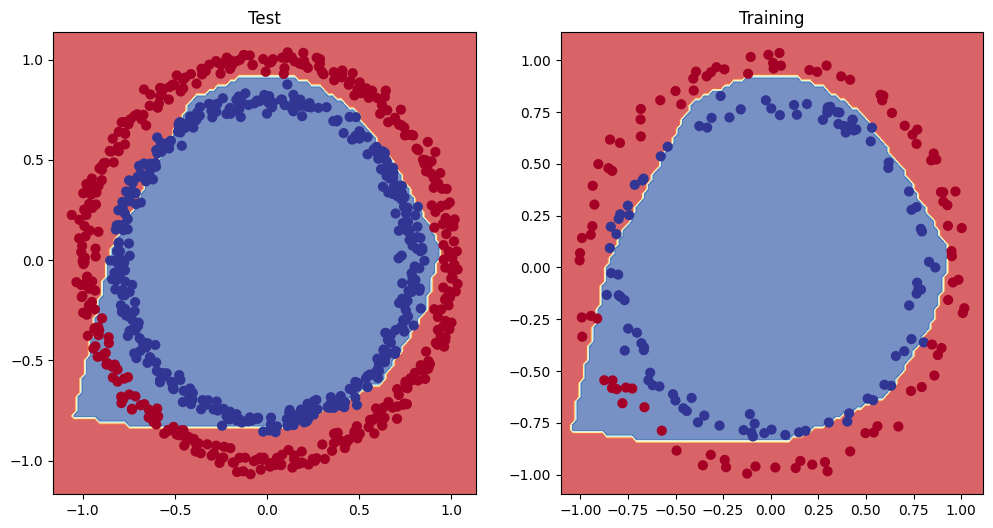

In [189]:
# Plot the predictions
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Training")
plot_decision_boundary(model_3,X_test,y_test)


## 7. Replicating non-linear activation functions

Neural network, rather than us telling the model what to learn, we give it the tools to discover patters in data and it tries to figure out the patters on its own.

And these tools ar elinear & non-linear function

In [190]:
# Create a tensor
A = torch.arange(-10,10,1,dtype = torch.float32)
A, A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

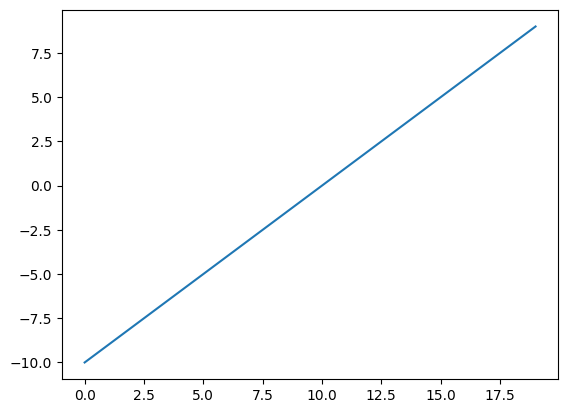

In [191]:
# Visualize the tensor
plt.plot(A)

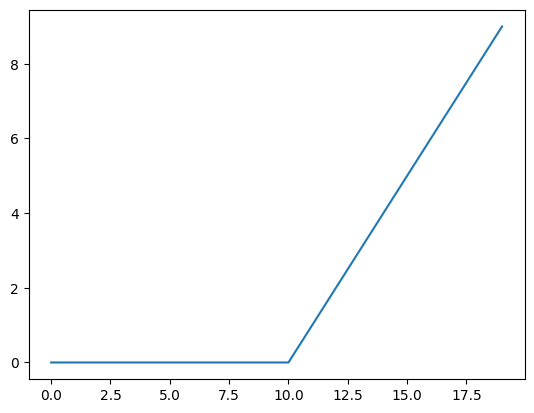

In [192]:
plt.plot(torch.relu(A));

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
         8., 9.]),
 [<matplotlib.lines.Line2D at 0x7aeb62d9e440>])

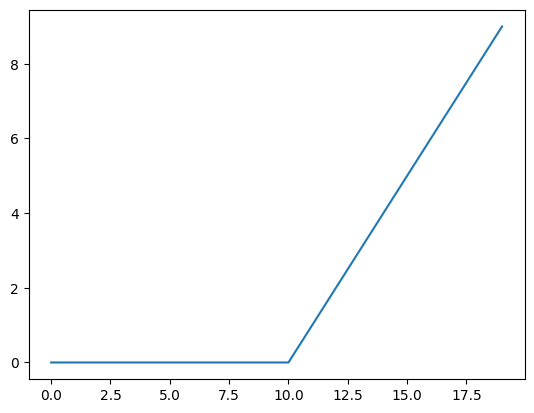

In [193]:
# Creating my own ReLU funciton
def relu(x: torch.tensor) -> torch.tensor:
  ''' In this function we take the maximum of 0 and the number provided to us'''
  return torch.maximum(torch.tensor(0), x)

relu(A), plt.plot(relu(A))

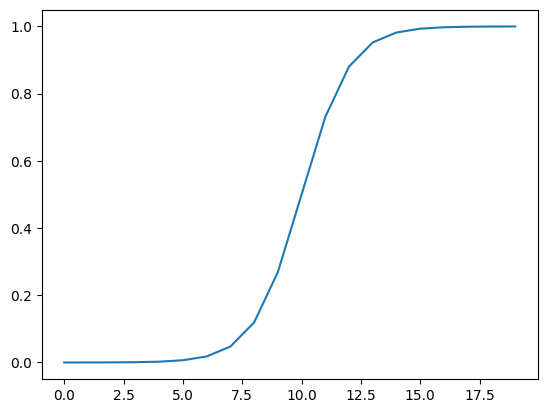

In [194]:
# Sigmoid function
plt.plot(torch.sigmoid(A));

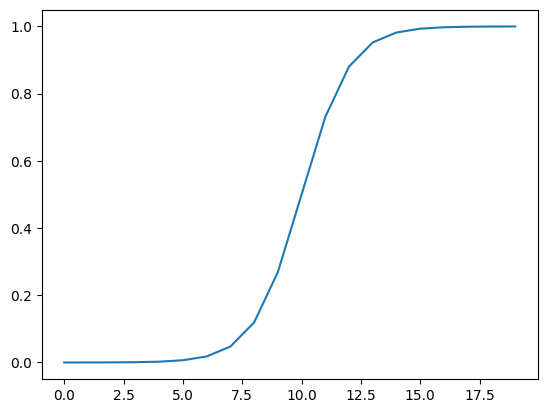

In [195]:
# Creating our own sigmoid funciton
def sigmoid(x: torch.tensor) -> torch.tensor:
  return 1/(1 + torch.exp(-x))

plt.plot(sigmoid(A))

## 8. Putting it all together with a multi-class classification problem
* Binary classification = ont thing or another(cat vs. dog, span vs not spam, fraund vs not fraud)
* Multi class classsification = more than one thing or another (cat vs. dog vs. chicken)

### 8.1 Creating a toy multi - class dataset

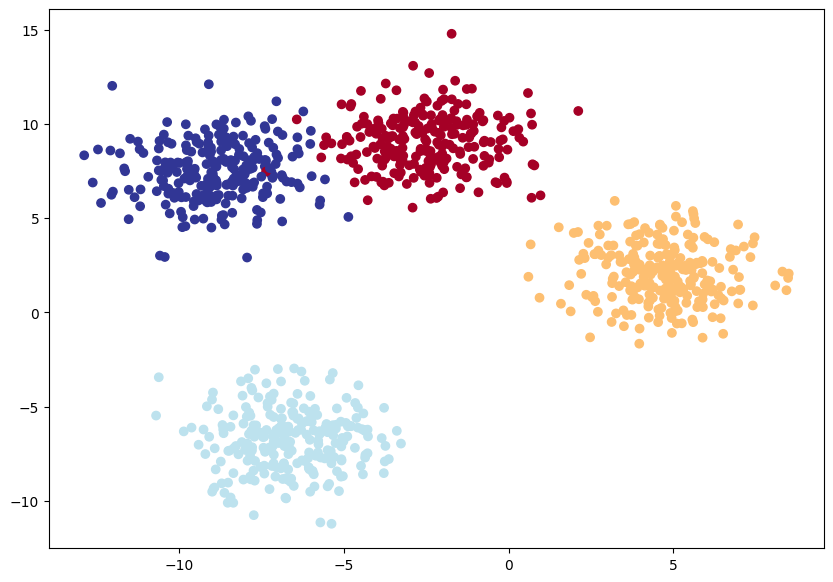

In [208]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create the multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000, n_features = NUM_FEATURES, centers = NUM_CLASSES, cluster_std = 1.5, random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob, test_size = 0.2, random_state = RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu);



### 8.3 Building a multi-class classificaiton model in PyTorch

In [209]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [210]:
# Build a multi-class classification model
class BlobModelV0(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """
    Initializes multi-class classification model

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output feartures (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(input_features, hidden_units),
        # nn.ReLU()
        nn.Linear(hidden_units,hidden_units),
        # nn.ReLU()
        nn.Linear(hidden_units,output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


# Create an instance of the model and send it to the target device
model_4 = BlobModelV0(input_features=2,output_features=4,hidden_units=8).to(device)
next(model_4.parameters()).device


device(type='cuda', index=0)

### 8.3 Create a loss function and optimizer for multi-class classification

In [211]:
# Create a loss function for multi-class classificaiton
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1)

### 8.4 Getting predicion probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels

Logits(raw output of the model) -> Prediction Probs(use `torch.softmax`) -> Prediction labels(takes `argmax` of the pred probs)

In [212]:
# Let's get some raw outputs of our model
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

In [213]:
y_pred_probs = torch.softmax(y_logits,dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


`softmax`: This reshapes the n dimmensional input into such a way that the n-dimmensional output tensor lie in the range [0,1] and sum to 1

softmax(Xi) = exp(Xi) / (sigma(exp(Xj)))

In [214]:
# Converting the prediction probability into prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

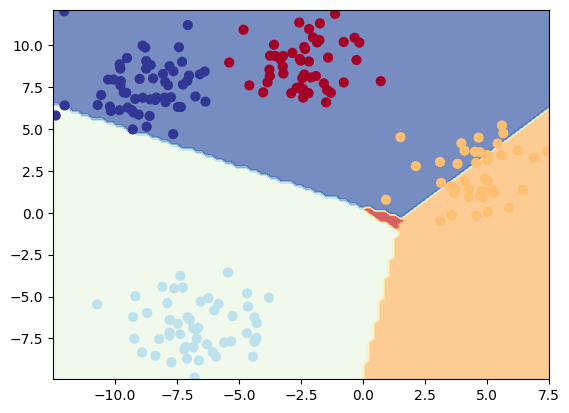

In [215]:
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

### 8.5 Creating a training loop and a testing loop for a multi-class PyTorch model

In [216]:
# Setting up the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Send the data to the device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)
model_4.to(device)
# Set the epochs
epochs = 100

for epoch in range(epochs):
  ### Training
  model_4.train()
  y_logits = model_4(X_blob_train)
  y_preds = torch.softmax(y_logits, dim =1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_blob_train,y_preds)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test)
    y_test_preds = torch.softmax(y_test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(y_test_logits, y_blob_test)
    test_acc = accuracy_fn(y_blob_test, y_test_preds)

  ### Printing what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")





Epoch: 0 | Loss: 1.0432, Acc: 65.50% | Test Loss: 0.5786, Test Acc: 95.50%
Epoch: 10 | Loss: 0.1440, Acc: 99.12% | Test Loss: 0.1304, Test Acc: 99.00%
Epoch: 20 | Loss: 0.0806, Acc: 99.12% | Test Loss: 0.0722, Test Acc: 99.50%
Epoch: 30 | Loss: 0.0592, Acc: 99.12% | Test Loss: 0.0513, Test Acc: 99.50%
Epoch: 40 | Loss: 0.0489, Acc: 99.00% | Test Loss: 0.0410, Test Acc: 99.50%
Epoch: 50 | Loss: 0.0429, Acc: 99.00% | Test Loss: 0.0349, Test Acc: 99.50%
Epoch: 60 | Loss: 0.0391, Acc: 99.00% | Test Loss: 0.0308, Test Acc: 99.50%
Epoch: 70 | Loss: 0.0364, Acc: 99.00% | Test Loss: 0.0280, Test Acc: 99.50%
Epoch: 80 | Loss: 0.0345, Acc: 99.00% | Test Loss: 0.0259, Test Acc: 99.50%
Epoch: 90 | Loss: 0.0330, Acc: 99.12% | Test Loss: 0.0242, Test Acc: 99.50%


### 8.6 Making and evaluatiing predictions with a PyTorch multi-class model

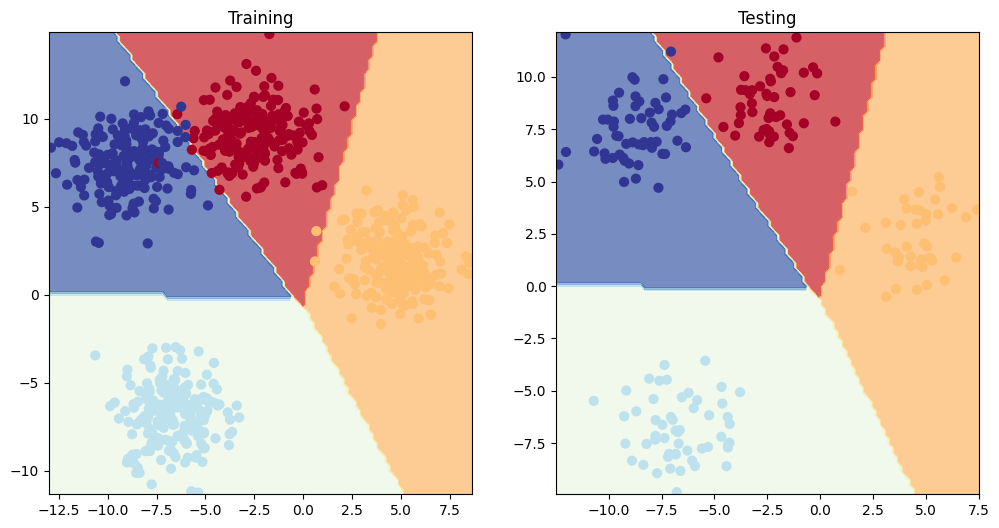

In [219]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)


## 9. A few more classification metrics...(to evaluate our clasification model)
* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report

See this article for when to use precision/recall - https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

If you want access to a lot of PyTorch metrics, see TorchMetrics - https://torchmetrics.readthedocs.io/en/latest/

# 10. Exercises & Extra-curriculum